<a href="https://colab.research.google.com/github/amthreeh/ComputerVision_Seminar/blob/main/4w_%EC%8B%A4%EC%8A%B52_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B_%ED%81%B4%EB%9E%98%EC%8A%A4_%EC%BB%A4%EC%8A%A4%ED%85%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4주차 - Pytorch

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/CV_seminar_project

/content/drive/MyDrive/CV_seminar_project


In [ ]:
pwd

'/content/drive/MyDrive/CV_seminar_project'

In [3]:
import torch
import torchvision
from torchvision import transforms
import os
import glob


device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(42)
if device == 'cuda':
  torch.cuda.manual_seed_all(42)

In [ ]:
device

'cuda'

In [5]:
root_path = '/content/drive/MyDrive/CV_seminar_project/'
train_path='/content/drive/MyDrive/CV_seminar_project/train'
test_path='/content/drive/MyDrive/CV_seminar_project/test'

dolphin_dir = '/dolphin'
shark_dir = '/shark'
whale_dir = '/whale'

# pytorch 데이터셋 클래스 실습

### 파이토치 데이터셋 클래스 직접 만들기
1. __init__ 생성자가 필요함.
2. __getitem__ 필요함. -> 데이터를 읽는 역할(인덱스 부여, iterable)
2. __len__ 필요함. -> 데이터 개수를 알려주는 역할

In [23]:
from torch.utils.data import Dataset, DataLoader  #커스터마이징
import cv2

class Custom_dataset(Dataset):   #mode -> 데이터 셋 종류
  def __init__(self, root_path, mode, transform=None): #생성자 특수메소드
    self.all_data = sorted(glob.glob(os.path.join(root_path, mode, '*', '*'))) #모든 데이터 경로의 리스트
    self.transform = transform #augmentation

  def __getitem__(self, index):

    if torch.is_tensor(index):
      index = index.tolist()

    #이미지 읽기
    data_path = self.all_data[index]
    image = cv2.imread(data_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #채널 축: BGR > RGB

    #transform (Augmentation)
    if self.transform is not None:
      augmentation = self.transform( image = image )
      image = augmentation['image']

    #label 만들어주기
    label = []
    if 'dolphin' in data_path.split('/')[-1]:
      label = 0
    elif 'shark' in data_path.split('/')[-1]:
      label = 1
    else:
      label = 2

    return image, label #입출력함수

  def __len__(self):
    length = len(self.all_data)  #전체 데이터 개수
    return length


In [27]:
root_path = '/content/drive/MyDrive/CV_seminar_project/'
train_path='/content/drive/MyDrive/CV_seminar_project/train'
test_path='/content/drive/MyDrive/CV_seminar_project/test'

dolphin_dir = '/dolphin'
shark_dir = '/shark'
whale_dir = '/whale'
from google.colab.patches import cv2_imshow
from PIL import Image as PILImage

pytorch_dataset = Custom_dataset(root_path = root_path, mode = 'train',transform=None)

# train_loader = torch.utils.data.DataLoader(pytorch_dataset, batch_size=1,
#                                            shuffle=None, num_workers = 0)

# for data, label in train_loader:
#   break

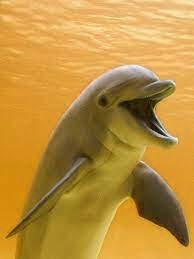

In [25]:
cv2_imshow(pytorch_dataset[0][0])

이미지가 잘 나왔으면 통과!          

더 강력한 augmentation 툴 albumentation 이용하기

In [41]:
import albumentations
import albumentations.pytorch

albumentations = albumentations.Compose( [
    albumentations.Resize(224, 224),
    #뒤집기, 돌리기
    albumentations.OneOf([
        albumentations.HorizontalFlip(p=0.8),
        albumentations.VerticalFlip(p=0.8),
        albumentations.RandomRotate90(p=0.8),
    ], p = 1), 
    #픽셀값 장난질
    albumentations.OneOf([
        albumentations.MotionBlur(p=0.8),  #흐리게
        albumentations.OpticalDistortion(p=0.8),  #왜곡
        albumentations.GaussNoise(p=0.8), #노이즈 추가
    ], p = 1),

    # albumentations.pytorch.transforms.ToTensor()  #0 - 1 만들기기
]
)

pytorch_dataset = Custom_dataset(root_path = root_path, mode = 'train', transform=albumentations)

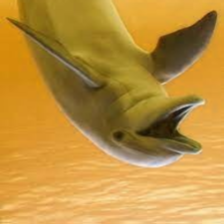

In [44]:
cv2_imshow(pytorch_dataset[0][0])